.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')

 We will create a model that attempts to predict the temperature in New York for a given month, day and hour.

preparing data

In [2]:
city_temp=pd.read_csv("../data/raw/temperature.csv", parse_dates=['datetime'])
city_humid=pd.read_csv("../data/raw/humidity.csv",parse_dates=['datetime'])
city_press=pd.read_csv("../data/raw/pressure.csv",parse_dates=['datetime'])
city_speed=pd.read_csv("../data/raw/wind_speed.csv",parse_dates=['datetime'])
city_dir=pd.read_csv("../data/raw/wind_direction.csv",parse_dates=['datetime'])
city_temp.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
38388,2017-02-17 00:00:00,280.355,279.95500,286.105000,281.805000,291.155000,291.680000,291.905000,293.305000,284.180000,...,272.955000,271.33,268.655,273.580000,276.005,274.905,278.905,285.680,285.68,274.180
1284,2012-11-24 00:00:00,280.710,280.91000,289.230000,280.530000,291.450000,289.810000,294.260000,296.770000,283.990000,...,278.110000,278.98,279.510,277.760000,288.710,289.150,291.150,292.710,292.71,289.360
28900,2016-01-18 16:00:00,279.940,278.68472,285.178008,279.988876,285.716572,285.564215,278.791371,279.812309,270.220909,...,266.522207,268.93,265.270,269.767166,281.018,287.560,289.350,285.150,285.15,287.580
9195,2013-10-19 15:00:00,279.460,278.42000,286.500000,279.880000,288.230000,288.010000,287.133333,288.190000,278.946667,...,286.300000,287.72,286.410,289.350000,293.837,296.250,302.150,294.545,293.29,292.277
3597,2013-02-28 09:00:00,276.980,278.80000,279.510000,278.020000,283.620000,283.770000,277.830000,281.660000,265.710000,...,278.440000,276.89,274.330,276.050000,295.400,292.790,294.500,292.800,292.80,295.700


For each city we have timeseries in a column. We are going to chose New York as our chosen city and temperature as our chosen feature. It is better to convert the temperature to Celsius.

In [3]:
data=city_temp[['datetime','New York']]
data=data.rename(columns={'New York':'temperature'})
data.head(5)
data['hour'] = data.datetime.dt.hour
sample = data[:168]

In [4]:
data_humid=city_humid[['datetime','New York']]
data_humid=data_humid.rename(columns={'New York':'humidity'})


In [5]:
city_press.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
8006,2013-08-31 02:00:00,1012.0,1014.0,1017.0,1036.0,1013.0,1011.0,1008.0,999.0,1010.0,...,1017.0,1016.0,1015.0,1017.0,986.0,1007.0,1007.0,1008.0,1008.0,986.0
23925,2015-06-25 09:00:00,1019.0,1003.0,1018.0,1022.0,966.0,984.0,930.0,975.0,867.0,...,1025.0,1015.0,1016.0,1027.0,989.0,1012.0,956.0,1019.0,1019.0,996.0
22937,2015-05-15 05:00:00,1013.0,1023.0,1024.0,1024.0,1025.0,1025.0,1020.0,1022.0,1019.0,...,1040.0,1026.0,1031.0,1038.0,998.0,1025.0,964.0,1025.0,999.0,1033.0
35754,2016-10-30 06:00:00,1008.0,992.0,1017.0,1017.0,962.0,982.0,918.0,974.0,849.0,...,1020.0,1023.0,1015.0,1020.0,990.0,1010.0,973.0,1028.0,1028.0,1003.0
34600,2016-09-12 04:00:00,1021.0,1019.0,1015.0,1022.0,1016.0,1016.0,1011.0,1011.0,1024.0,...,1021.0,1021.0,1020.0,1019.0,985.0,1012.0,1011.0,1012.0,1012.0,1012.0


In [6]:
data_press=city_press[['datetime','New York']]
data_press=data_press.rename(columns={'New York':'pressure'})
data_press.head(5)

,datetime,pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1012.0
2,2012-10-01 14:00:00,1012.0
3,2012-10-01 15:00:00,1012.0
4,2012-10-01 16:00:00,1012.0


In [7]:
data_speed=city_speed[['datetime','New York']]
data_speed=data_speed.rename(columns={'New York':'wind_speed'})
data_speed.head(5)

,datetime,wind_speed
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,7.0
2,2012-10-01 14:00:00,7.0
3,2012-10-01 15:00:00,7.0
4,2012-10-01 16:00:00,7.0


In [8]:
data_dir=city_dir[['datetime','New York']]
data_dir=data_dir.rename(columns={'New York':'wind_direction'})
data_dir.head(5)

,datetime,wind_direction
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,260.0
2,2012-10-01 14:00:00,260.0
3,2012-10-01 15:00:00,260.0
4,2012-10-01 16:00:00,260.0


we havesome missing value. All features's tend to be constant from one hour to the next, so we can use backfill to replace any missing values and drop the rest.

In [9]:
data = data.fillna(method = 'bfill', axis=0).dropna()
data_press = data_press.fillna(method = 'bfill', axis=0).dropna()
data_humid = data_humid.fillna(method = 'bfill', axis=0).dropna()
data_dir = data_dir.fillna(method = 'bfill', axis=0).dropna()
data_speed = data_speed.fillna(method = 'bfill', axis=0).dropna()

In [10]:
total_data=pd.concat([data,data_humid['humidity'],data_press['pressure'],data_speed['wind_speed'],data_dir['wind_direction']], axis=1)

In [11]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction
0,2012-10-01 12:00:00,288.220000,12,58.0,1012.0,7.0,260.0
1,2012-10-01 13:00:00,288.220000,13,58.0,1012.0,7.0,260.0
2,2012-10-01 14:00:00,288.247676,14,57.0,1012.0,7.0,260.0
3,2012-10-01 15:00:00,288.326940,15,57.0,1012.0,7.0,260.0
4,2012-10-01 16:00:00,288.406203,16,57.0,1012.0,7.0,260.0


There is no missing value and there is no outlayer so our data looks good.

# feature engineering

In [12]:
#convert kelvin to celsios
total_data["temperature"].describe()
total_data["temperature"]=total_data["temperature"] - 273.15

count    44461.000000
mean        12.250469
std         10.220826
min        -22.376000
25%          4.220000
50%         12.720000
75%         20.610000
max         37.090000
Name: temperature, dtype: float64


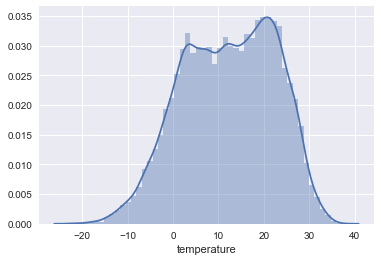

In [13]:
print(total_data.temperature.describe())
plot = sns.distplot(total_data.temperature)

count    44461.000000
mean        66.516790
std         19.884897
min         10.000000
25%         51.000000
50%         68.000000
75%         83.000000
max        100.000000
Name: humidity, dtype: float64


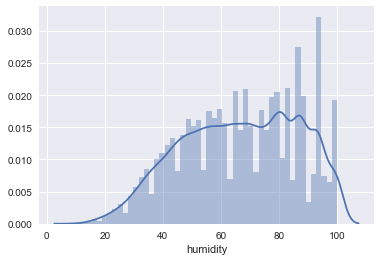

In [14]:
print(total_data.humidity.describe())
plot = sns.distplot(total_data.humidity)

count    44461.000000
mean      1017.021142
std         10.113110
min        959.000000
25%       1012.000000
50%       1017.000000
75%       1023.000000
max       1052.000000
Name: pressure, dtype: float64


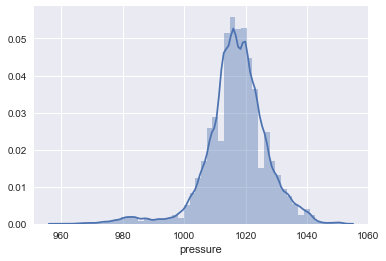

In [15]:
print(total_data.pressure.describe())
plot = sns.distplot(total_data.pressure)

count    44461.000000
mean         3.211039
std          2.189765
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         25.000000
Name: wind_speed, dtype: float64


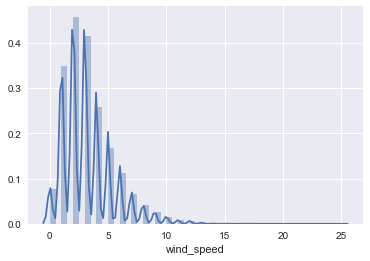

In [16]:
print(total_data.wind_speed.describe())
plot = sns.distplot(total_data.wind_speed)

count    44461.000000
mean       196.251681
std        107.432893
min          0.000000
25%        104.000000
50%        220.000000
75%        289.000000
max        360.000000
Name: wind_direction, dtype: float64


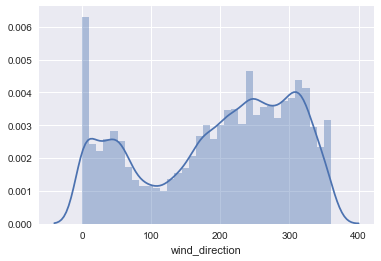

In [17]:
print(total_data.wind_direction.describe())
plot = sns.distplot(total_data.wind_direction)

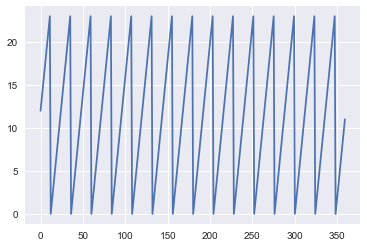

In [18]:
#We are going to extract the hours from the datetime
total_data['hour']=total_data.datetime.dt.hour
# chose a sample aproximatly 15 days
sample=total_data[:360]
sample['hour'].plot()

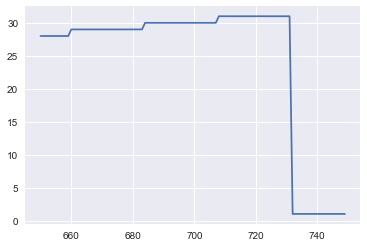

In [19]:
total_data['day']=total_data.datetime.dt.day
sample=total_data[650:750]
sample['day'].plot()

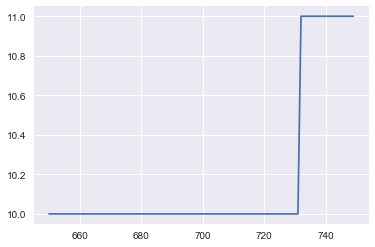

In [21]:
total_data['month']=total_data.datetime.dt.month
sample=total_data[650:750]
sample['month'].plot()

we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learning algorithem. we chose one day to have a look at the time arounf midnight

In [22]:
sample[33:38]

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,day,month
683,2012-10-29 23:00:00,14.09,23,72.0,1006.0,10.0,40.0,29,10
684,2012-10-30 00:00:00,14.09,0,72.0,1006.0,11.0,50.0,30,10
685,2012-10-30 01:00:00,13.95,1,76.0,1006.0,13.0,50.0,30,10
686,2012-10-30 02:00:00,13.82,2,71.0,1005.0,10.0,40.0,30,10
687,2012-10-30 03:00:00,13.44,3,71.0,1005.0,12.0,50.0,30,10


between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [23]:
def cyclical(dataset,column,max_v):
    dataset[column+'_sin']=np.sin(2*np.pi*dataset[column]/max_v)
    dataset[column+'_cos']=np.cos(2*np.pi*dataset[column]/max_v)
    return dataset


In [24]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,day,month
0,2012-10-01 12:00:00,15.070000,12,58.0,1012.0,7.0,260.0,1,10
1,2012-10-01 13:00:00,15.070000,13,58.0,1012.0,7.0,260.0,1,10
2,2012-10-01 14:00:00,15.097676,14,57.0,1012.0,7.0,260.0,1,10
3,2012-10-01 15:00:00,15.176940,15,57.0,1012.0,7.0,260.0,1,10
4,2012-10-01 16:00:00,15.256203,16,57.0,1012.0,7.0,260.0,1,10


In [25]:
total_data= cyclical(total_data,'hour',23.0)
total_data= cyclical(total_data,'day',365.0)
total_data= cyclical(total_data,'month',12.0)

In [28]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,day,month,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,2012-10-01 12:00:00,15.070000,12,58.0,1012.0,7.0,260.0,1,10,-0.136167,-0.990686,0.017213,0.999852,-0.866025,0.5
1,2012-10-01 13:00:00,15.070000,13,58.0,1012.0,7.0,260.0,1,10,-0.398401,-0.917211,0.017213,0.999852,-0.866025,0.5
2,2012-10-01 14:00:00,15.097676,14,57.0,1012.0,7.0,260.0,1,10,-0.631088,-0.775711,0.017213,0.999852,-0.866025,0.5
3,2012-10-01 15:00:00,15.176940,15,57.0,1012.0,7.0,260.0,1,10,-0.816970,-0.576680,0.017213,0.999852,-0.866025,0.5
4,2012-10-01 16:00:00,15.256203,16,57.0,1012.0,7.0,260.0,1,10,-0.942261,-0.334880,0.017213,0.999852,-0.866025,0.5


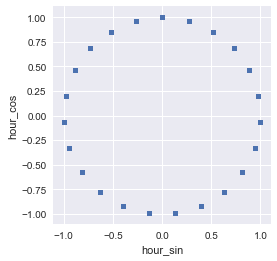

In [30]:
total_data.plot.scatter('hour_sin','hour_cos').set_aspect('equal')

now, it is prefect to present as a cyclical feature for machine learning algorithms.

In [196]:
#total_data.to_csv("New York_hourlyWeather_cyclical.csv.gz",index=False,compression="gzip")

In [51]:
# feature engineering
X_columns = ['hour_sin', 'hour_cos', 'day_sin', 'day_sin', 'month_sin', 'month_cos']
y_column = ['temperature']

# training and Test


In [52]:
# split the data

threshold = 0.8
absolute_threshold = int(len(total_data)*threshold)

X_train = total_data.ix[:absolute_threshold, X_columns]
y_train = total_data.ix[:absolute_threshold, y_column]

X_test = total_data.ix[absolute_threshold:, X_columns]
y_test = total_data.ix[absolute_threshold:, y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (35569, 6)
y_train (35569, 1)
X_test (8893, 6)
y_test (8893, 1)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Negah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [54]:
# feature importance
importance = []
for i in range(len(X_columns)):
    importance.append([X_columns[i], model.feature_importances_[i]])
pd.DataFrame(importance).sort_values(by=1, ascending=False)

,0,1
5,month_cos,0.422794
4,month_sin,0.421478
0,hour_sin,0.050262
3,day_sin,0.039943
2,day_sin,0.033819
1,hour_cos,0.031704


In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 4.210247733862566
RMSE 5.366536223742923


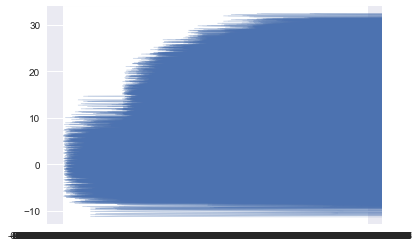

In [50]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()

In [ ]:
X_train = get_unencoded_features(data_train)
X_test  = get_unencoded_features(data_test)
y_train = data_train.temperature
y_test  = data_test.temperature